<a href="https://colab.research.google.com/github/beret21/gimp-plugin-gaugan/blob/master/Churn_Modeling(Naive_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Churn Modeling 실습

In [4]:
# 분석할 데이터 업로드 하기
# 업로드 방법 참조: https://brunch.co.kr/@jayden-factory/18 

from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))


Saving predictions_Exited.csv to predictions_Exited.csv
User uploaded file "predictions_Exited.csv" with length 956513 bytes


LOAD PREDICTION RESULT DATA

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-white")

In [25]:
df = pd.read_csv("./predictions_Exited.csv")
df.head()

,Exited_INDEXED,target_prediction,target_set,explanation1,score1,explanation2,score2,target_gt,Age,Balance,NumOfProducts
0,0.377869,1,train,Age,0.054171,NumOfProducts,-0.018820,1,42.0,0.00,1.0
1,0.154525,0,train,Balance,0.045404,NumOfProducts,-0.018820,0,41.0,83807.86,1.0
2,0.981729,1,train,Balance,0.106856,NumOfProducts,-0.046728,1,42.0,159660.80,3.0
3,0.054986,0,train,Balance,0.032970,Age,-0.071820,0,39.0,0.00,2.0
4,0.176615,0,train,Balance,-0.107200,NaN,NaN,0,43.0,125510.82,1.0


SORTING DATAFRAME by PREDICTION PROB VALUE

In [7]:
df = df[['Exited_INDEXED', 'target_prediction', 'target_gt', 'Age', 'Balance', 'NumOfProducts']]
df = df.sort_values('Exited_INDEXED')
df.head()

,Exited_INDEXED,target_prediction,target_gt,Age,Balance,NumOfProducts
7719,0.000004,0,0,71.0,53013.29,2.0
6721,0.000004,0,0,77.0,27517.15,2.0
6046,0.000004,0,0,69.0,187013.13,2.0
1613,0.000004,0,0,29.0,59385.98,2.0
2458,0.001287,0,0,88.0,0.00,2.0


PREDICTION PROB vs. AGE

In [0]:
age = df['Age']
tgt_pred_cls = df['target_prediction']
tgt_gt = df['target_gt']
tgt_pred_val = df['Exited_INDEXED']

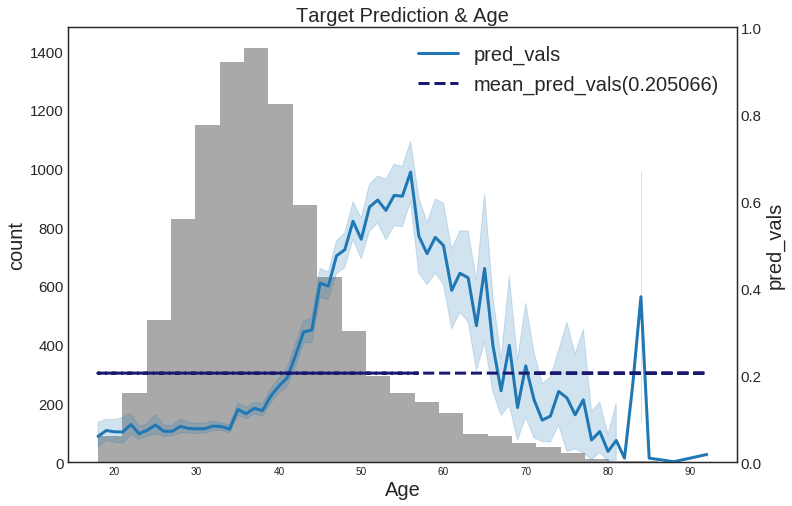

In [9]:
# Age x pred_vals graph

fig, ax1 = plt.subplots(figsize=(12, 8))
plt.title('Target Prediction & Age', fontsize=20)

# ax1 - histogram part
_, bins, _ = ax1.hist(age, bins=25, color='darkgray')
ax1.set_xlabel('Age', fontsize=20)
ax1.set_ylabel('count', fontsize=20)
ax1.tick_params(axis='y', labelsize=15)

tgt_pred_means = [tgt_pred_val.mean()] * len(tgt_pred_val)

# ax2 - lineplot part
ax2 = ax1.twinx()
sns.lineplot(x='Age', y='Exited_INDEXED', lw=3, label="pred_vals", data=df)
ax2.plot(age, tgt_pred_means, color='midnightblue', lw=3, linestyle='--',
         label='mean_pred_vals(%f)' % tgt_pred_val.mean())
ax2.set_ylabel('pred_vals', fontsize=20)
ax2.tick_params(axis='y', labelsize=15)
ax2.set_ylim([0, 1])
ax2.legend(fontsize=20)

plt.show()

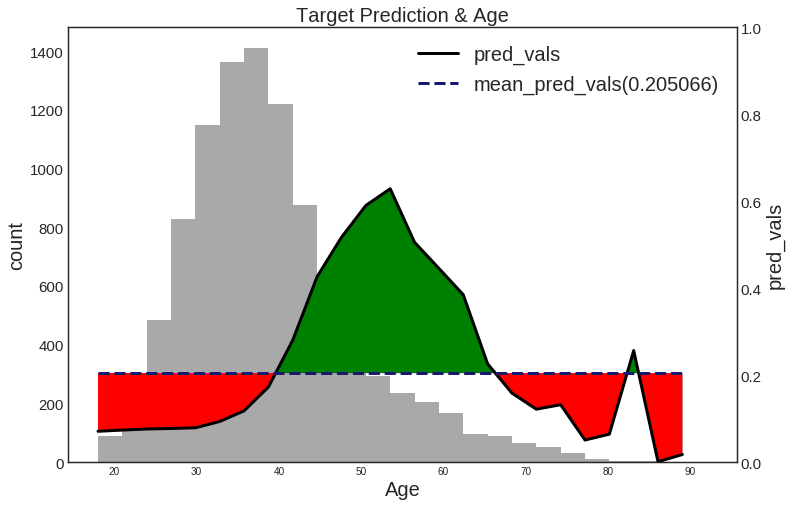

In [10]:
# Age x pred_vals graph

fig, ax1 = plt.subplots(figsize=(12, 8))
plt.title('Target Prediction & Age', fontsize=20)

# ax1 - histogram part
_, bins, _ = ax1.hist(age, bins=25, color='darkgray')
ax1.set_xlabel('Age', fontsize=20)
ax1.set_ylabel('count', fontsize=20)
ax1.tick_params(axis='y', labelsize=15)

bin_means = tgt_pred_val.groupby(pd.cut(age, bins=bins)).mean()
tgt_pred_means = [tgt_pred_val.mean()] * len(bin_means)

# ax2 - lineplot part
ax2 = ax1.twinx()
ax2.plot(bins[:-1], bin_means, color='black', lw=3, label='pred_vals')
ax2.plot(bins[:-1], tgt_pred_means, color='midnightblue', lw=3, linestyle='--',
         label='mean_pred_vals(%f)' % tgt_pred_val.mean())
ax2.set_ylabel('pred_vals', fontsize=20)
ax2.tick_params(axis='y', labelsize=15)
ax2.set_ylim([0, 1])
ax2.legend(fontsize=20)

ax2.fill_between(bins[:-1], tgt_pred_means, bin_means)

# fill between space
x, y1, y2 = bins[:-1], tgt_pred_means, bin_means
ax2.fill_between(x, y1, y2,
                 where = y2 >= y1, facecolor='green', interpolate=True)
ax2.fill_between(x, y1, y2,
                 where = y2 <= y1, facecolor='red', interpolate=True)

plt.show()

PREDICTION PROB vs. PREDICTION CLASS

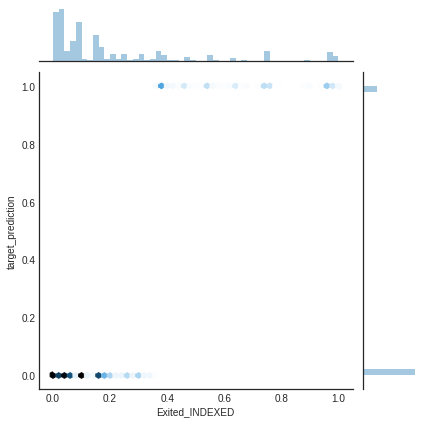

In [11]:
sns.jointplot(x='Exited_INDEXED', y='target_prediction', data=df, kind='hex')

PREDICTION PROB vs. GT

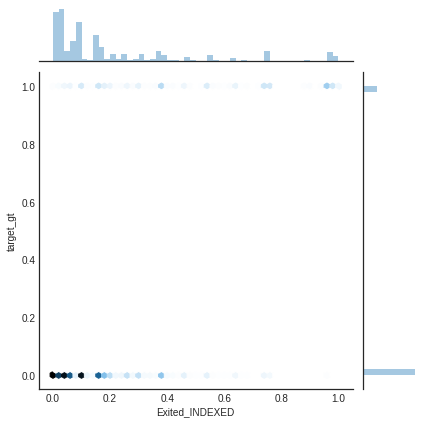

In [12]:
sns.jointplot(x='Exited_INDEXED', y='target_gt', data=df, kind='hex')

AGE vs. GT

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1169: Runtim

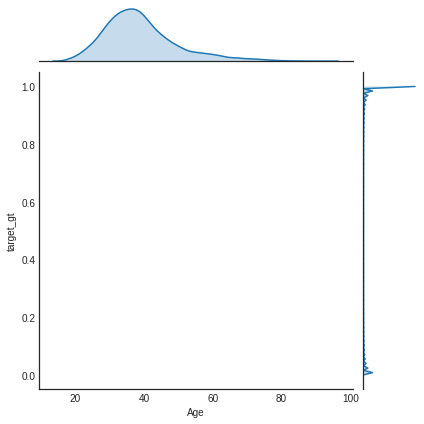

In [13]:
sns.jointplot(x='Age', y='target_gt', data=df, kind='kde')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1169: Runtim

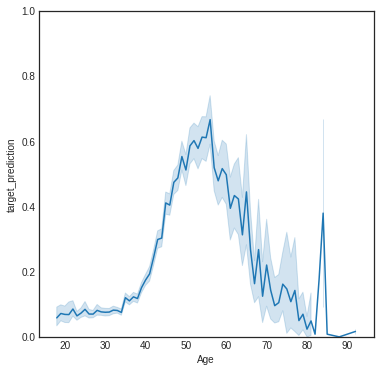

In [14]:
f, ax = plt.subplots(figsize=(6, 6))
sns.lineplot(x='Age', y='Exited_INDEXED', data=df, ax=ax)
sns.kdeplot(df['Age'], df['target_prediction'], ax=ax)

HIST of AGE by PREDICTION CLASSES

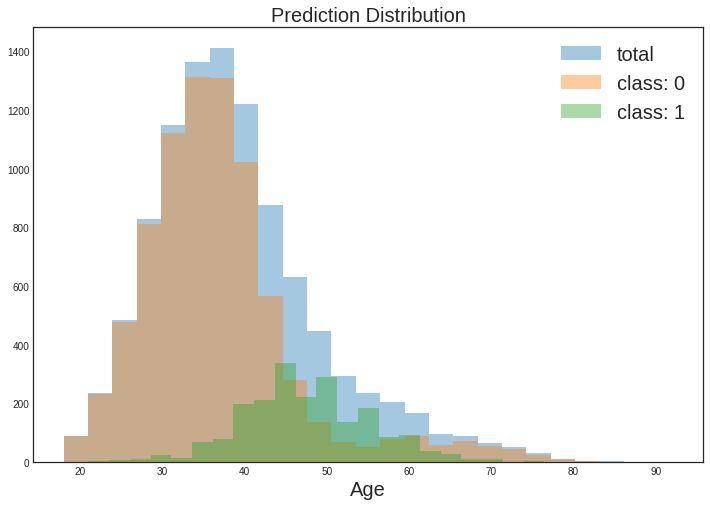

In [15]:
# prediction
X = 'Age'

plt.subplots(figsize=(12, 8))

tgt_labels = [0, 1]
bins = 25
sns.distplot(df[X], bins=bins, kde=False, label='total')

for tgt_label in tgt_labels:
    subset = df[df['target_prediction'] == tgt_label]
    
    sns.distplot(subset[X], kde=False, hist=True, bins=bins, norm_hist=False,
                 kde_kws = {'shade':True, 'linewidth': 3},
                 label='class: %s' % tgt_label)

plt.title('Prediction Distribution', fontsize=20)
plt.xlabel(X, fontsize=20)
plt.legend(fontsize=20)

plt.show()

**HIST OF AGE by GT CLASSES**

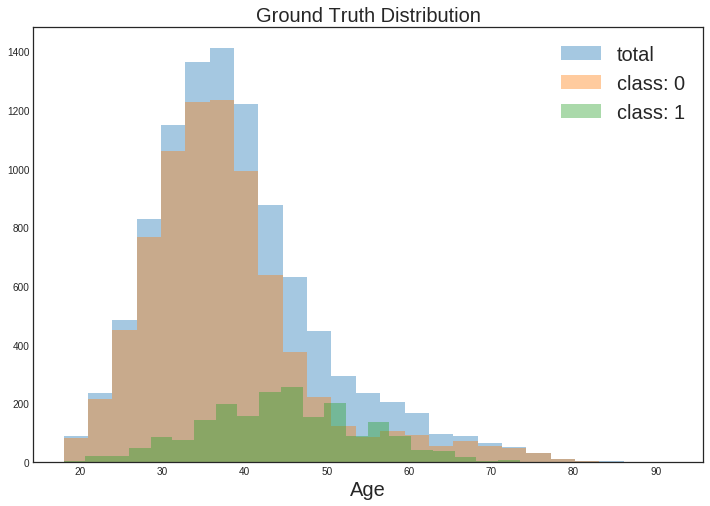

In [16]:
# ground truth
X = 'Age'

plt.subplots(figsize=(12, 8))

tgt_labels = [0, 1]
bins = 25
sns.distplot(df[X], bins=bins, kde=False, label='total')

for tgt_label in tgt_labels:
    subset = df[df['target_gt'] == tgt_label]
    
    sns.distplot(subset[X], kde=False, hist=True, bins=bins, norm_hist=False,
                 kde_kws = {'shade':True, 'linewidth': 3},
                 label='class: %s' % tgt_label)

plt.title('Ground Truth Distribution', fontsize=20)
plt.xlabel(X, fontsize=20)
plt.legend(fontsize=20)

plt.show()

**HIST OF BALANCE by PREDICTION CLASSES**

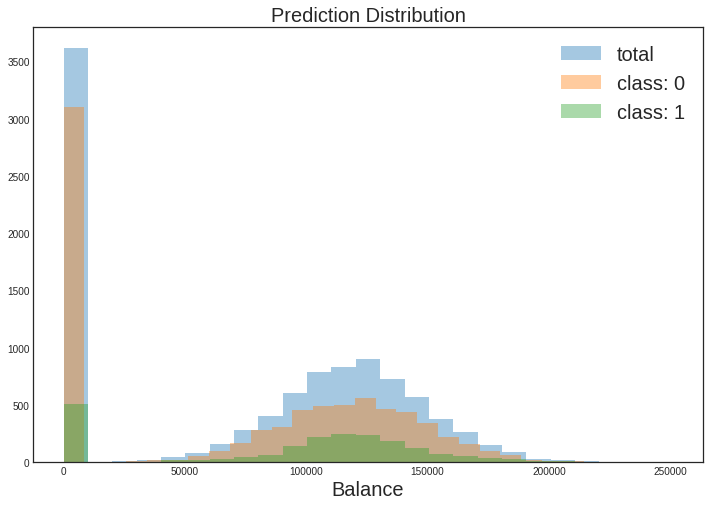

In [17]:
# prediction
X = 'Balance'

plt.subplots(figsize=(12, 8))

tgt_labels = [0, 1]
bins = 25
sns.distplot(df[X], bins=bins, kde=False, label='total')

for tgt_label in tgt_labels:
    subset = df[df['target_prediction'] == tgt_label]
    
    sns.distplot(subset[X], kde=False, hist=True, bins=bins, norm_hist=False,
                 kde_kws = {'shade':True, 'linewidth': 3},
                 label='class: %s' % tgt_label)

plt.title('Prediction Distribution', fontsize=20)
plt.xlabel(X, fontsize=20)
plt.legend(fontsize=20)

plt.show()

**HIST OF BALANCE by GT CLASSES**

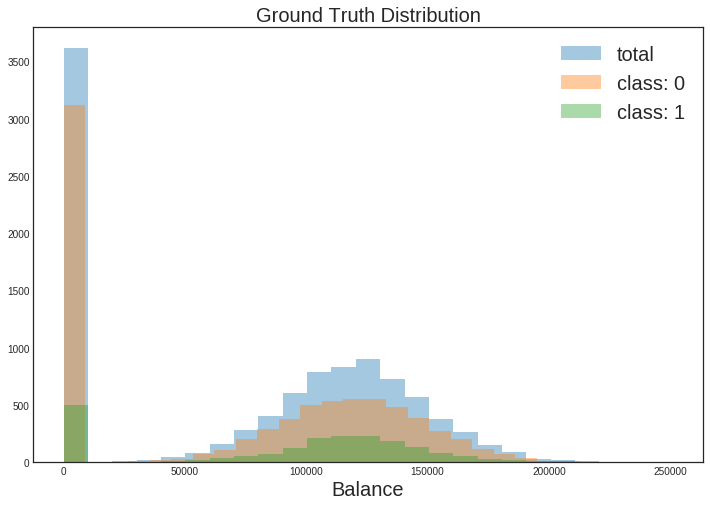

In [18]:
# ground truth
X = 'Balance'

plt.subplots(figsize=(12, 8))

tgt_labels = [0, 1]
bins = 25
sns.distplot(df[X], bins=bins, kde=False, label='total')

for tgt_label in tgt_labels:
    subset = df[df['target_gt'] == tgt_label]
    
    sns.distplot(subset[X], kde=False, hist=True, bins=bins, norm_hist=False,
                 kde_kws = {'shade':True, 'linewidth': 3},
                 label='class: %s' % tgt_label)

plt.title('Ground Truth Distribution', fontsize=20)
plt.xlabel(X, fontsize=20)
plt.legend(fontsize=20)

plt.show()

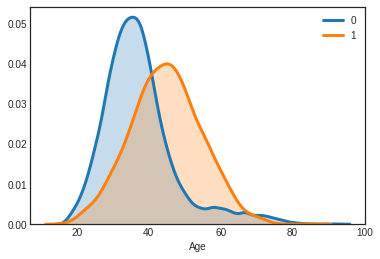

In [19]:
# histogram kde
tgt_labels = [0, 1]

for tgt_label in tgt_labels:
    subset = df[df['target_gt'] == tgt_label]
    
    sns.distplot(subset['Age'], hist=False, bins=25,
                 kde_kws = {'shade':True, 'linewidth': 3},
                 label=tgt_label)